# DX 602 Final Project

## Introduction

In this project, you will practice the skills that you have learned throughout this module with a heavy focus on building models.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform build models, run a computation, or otherwise perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
The Thanksgiving holiday was also taken into account in setting the deadline.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - red subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_red))
* [Body Fat](https://www.openml.org/search?type=data&status=active&id=560) ([PMLB](https://github.com/EpistasisLab/pmlb/tree/master/datasets/560_bodyfat))

The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the dataset has missing data, you should drop the rows with missing data before proceeding.
If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE

# read and show a sample of the data
df = pd.read_csv("winequality-red.csv", sep=";")
df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1459,7.9,0.20,0.35,1.7,0.054,7.0,15.0,0.99458,3.32,0.80,11.9,7
1370,8.7,0.78,0.51,1.7,0.415,12.0,66.0,0.99623,3.00,1.17,9.2,5
636,9.6,0.88,0.28,2.4,0.086,30.0,147.0,0.99790,3.24,0.53,9.4,5
236,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6
814,12.6,0.41,0.54,2.8,0.103,19.0,41.0,0.99939,3.21,0.76,11.3,6
951,8.3,0.28,0.48,2.1,0.093,6.0,12.0,0.99408,3.26,0.62,12.4,7
1098,8.0,0.31,0.45,2.1,0.216,5.0,16.0,0.99358,3.15,0.81,12.5,7
1201,7.9,0.34,0.36,1.9,0.065,5.0,10.0,0.99419,3.27,0.54,11.2,7
1354,7.2,0.58,0.03,2.3,0.077,7.0,28.0,0.99568,3.35,0.52,10.0,5
578,8.8,0.47,0.49,2.9,0.085,17.0,110.0,0.99820,3.29,0.60,9.8,5


In [4]:
# checking for missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all of the columns and describe them in your own words.

In [5]:
# YOUR CODE HERE
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Explanation of Columns

**Fixed Acidity** : Non-volatile acids that are naturally present in red wine and do NOT evaporate easily hence the name "fixed acidity". Examples of these acids include tartaric and malic acid. Measured in grams per liter (g/L) with a typical range from 4.5 to 8.5 g/L. Important for tasting notes since wines with a higher fixed acidity are more tart. 

**Volatile Acidity**: Volatile acidity (VA) in small amounts is natural in the wine making process; however, if the wine is exposed to excessive amounts of oxygen then VA amounts will increase. For red wines the max amount of VA legally allowed is 1.4 grams per liter (g/L). Typical red wines have a value of 0.6 g/L. Very important to measure the quality of wine, high level of VA can lead to the wine smelling like vinegar or nail polish.

**Citric Acid**: Measured in grams per liter (g/L) with a typical range of 0.2 - 0.5 g/L. Added to bring a fresh and crisp feeling to red wine. To much citric acid can cause negative impacts by creating a environment for microbial growth. 

**Residual Sugar**: Measured in grams per liter (g/L), with a range from 1 g/L to greater than 35 g/L. Less residual sugar means a more dry wine while the opposite is an increase in sweetness of the wine. Residual sugars occur due to the natural process of fermentation. Contributes to the sweetness of the wine. 

**Chlorides**: The amount of NaCl or salt found in the wine. To much salt is undesirable because it can lead to an unpleasant taste. Measured in grams per liter (g/L), with a typical range in red wine varying from 0.08 g/L to 0.10 g/L.

**Free Sulfur Dioxide**: Naturally occurring and added during the wine making process. Used to prevent oxidation in red wines. Measured in milligrams per liter (mg/L) with a typical range of anywhere from 25 - 30 mg/L in red wines.  

**Total Sulfur Dioxide**: The total of both "free" and "bound" sulfur dioxide. Bound sulfur dioxide is no longer available to prevent oxidation. Hight amounts of "bound" sulfur dioxides can indicate spoilage. Measured in milligrams per liter (mg/L), with a typical range of 50 - 350 mg/L. The United States legal limit is 350 mg/L.

**Density**: Measured in grams per milliliter (g/mL), and ranges from 0.990 to 1.014 g/mL in red wine. Provides information about alcohol content and residual sugar levels. For tasting notes density is related to how the wine feels in the tasters mouth. 

**pH**: Range of pH for red wine is typically 3.3 - 3.6. High acidity is needed to prevent the growth of microbes. pH gives red wine the crisp and fresh flavor.

**Sulphates**: Used as a preservative in the wine making process. Sulphates are naturally occurring and typically added during the wine making process. High amounts of sulphates are linked to a bitter taste in wine. The typical range is 50 mg/L - 75 mg/L. 

**Alcohol**: Percentage of alcohol in the red wine. Alcohol percentage contributes to the taste of the wine. The typical alcohol percentage in red wine is 12% - 15%.

**Quality (target)**: Rating of the red wine. The wine rating is on a scale of 0-10; however, the minimum and maximum values actually observed were 3 and 8 respectively.

YOUR ANSWERS HERE

### Problem 3 (50 points)

Perform an exploratory analysis of the data set.
After your exploratory analysis, pick 3 individual charts that you the think were particularly interesting.
Repeat those charts separately from your original analysis, and after each of those charts, explain what you thought was noteworthy.

In [6]:
# checking for missing values
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
# finding base statistics for each column
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


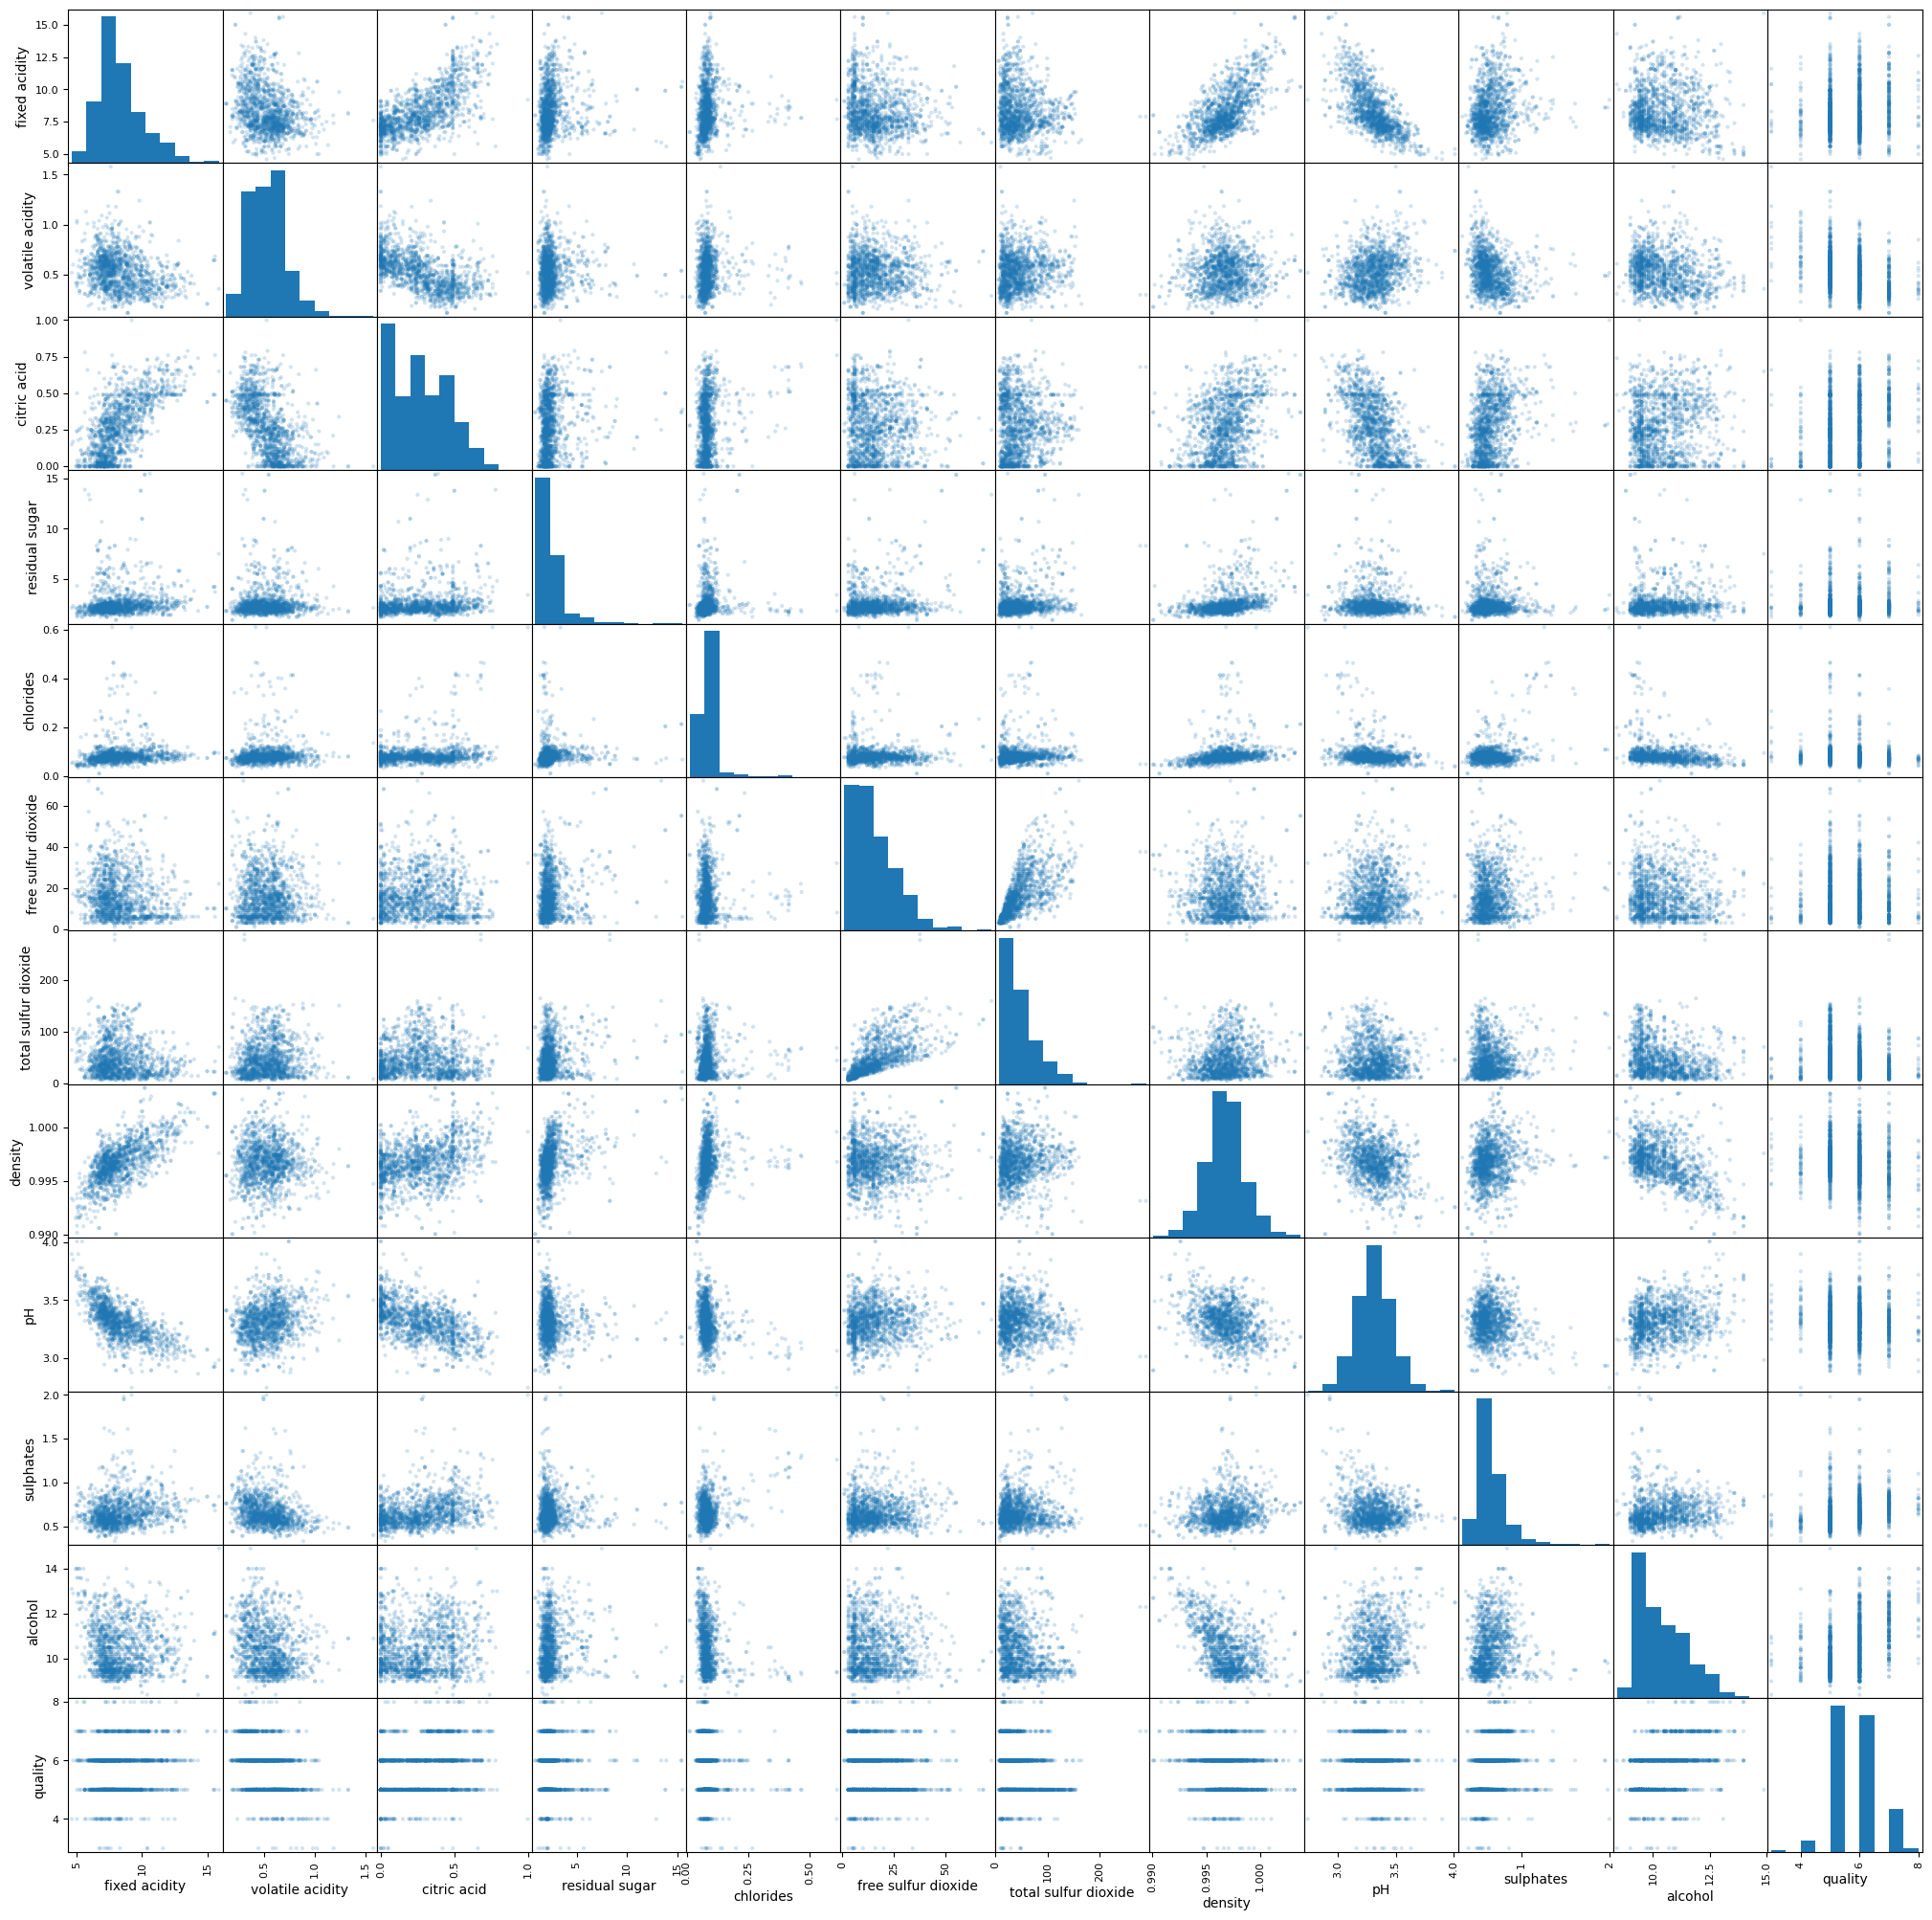

In [8]:
# YOUR CODE HERE

# scatter matrix for looking at correlations visually 
scatter_matrix_plot = pd.plotting.scatter_matrix(df, figsize=(25,25), alpha=0.2)
plt.show()

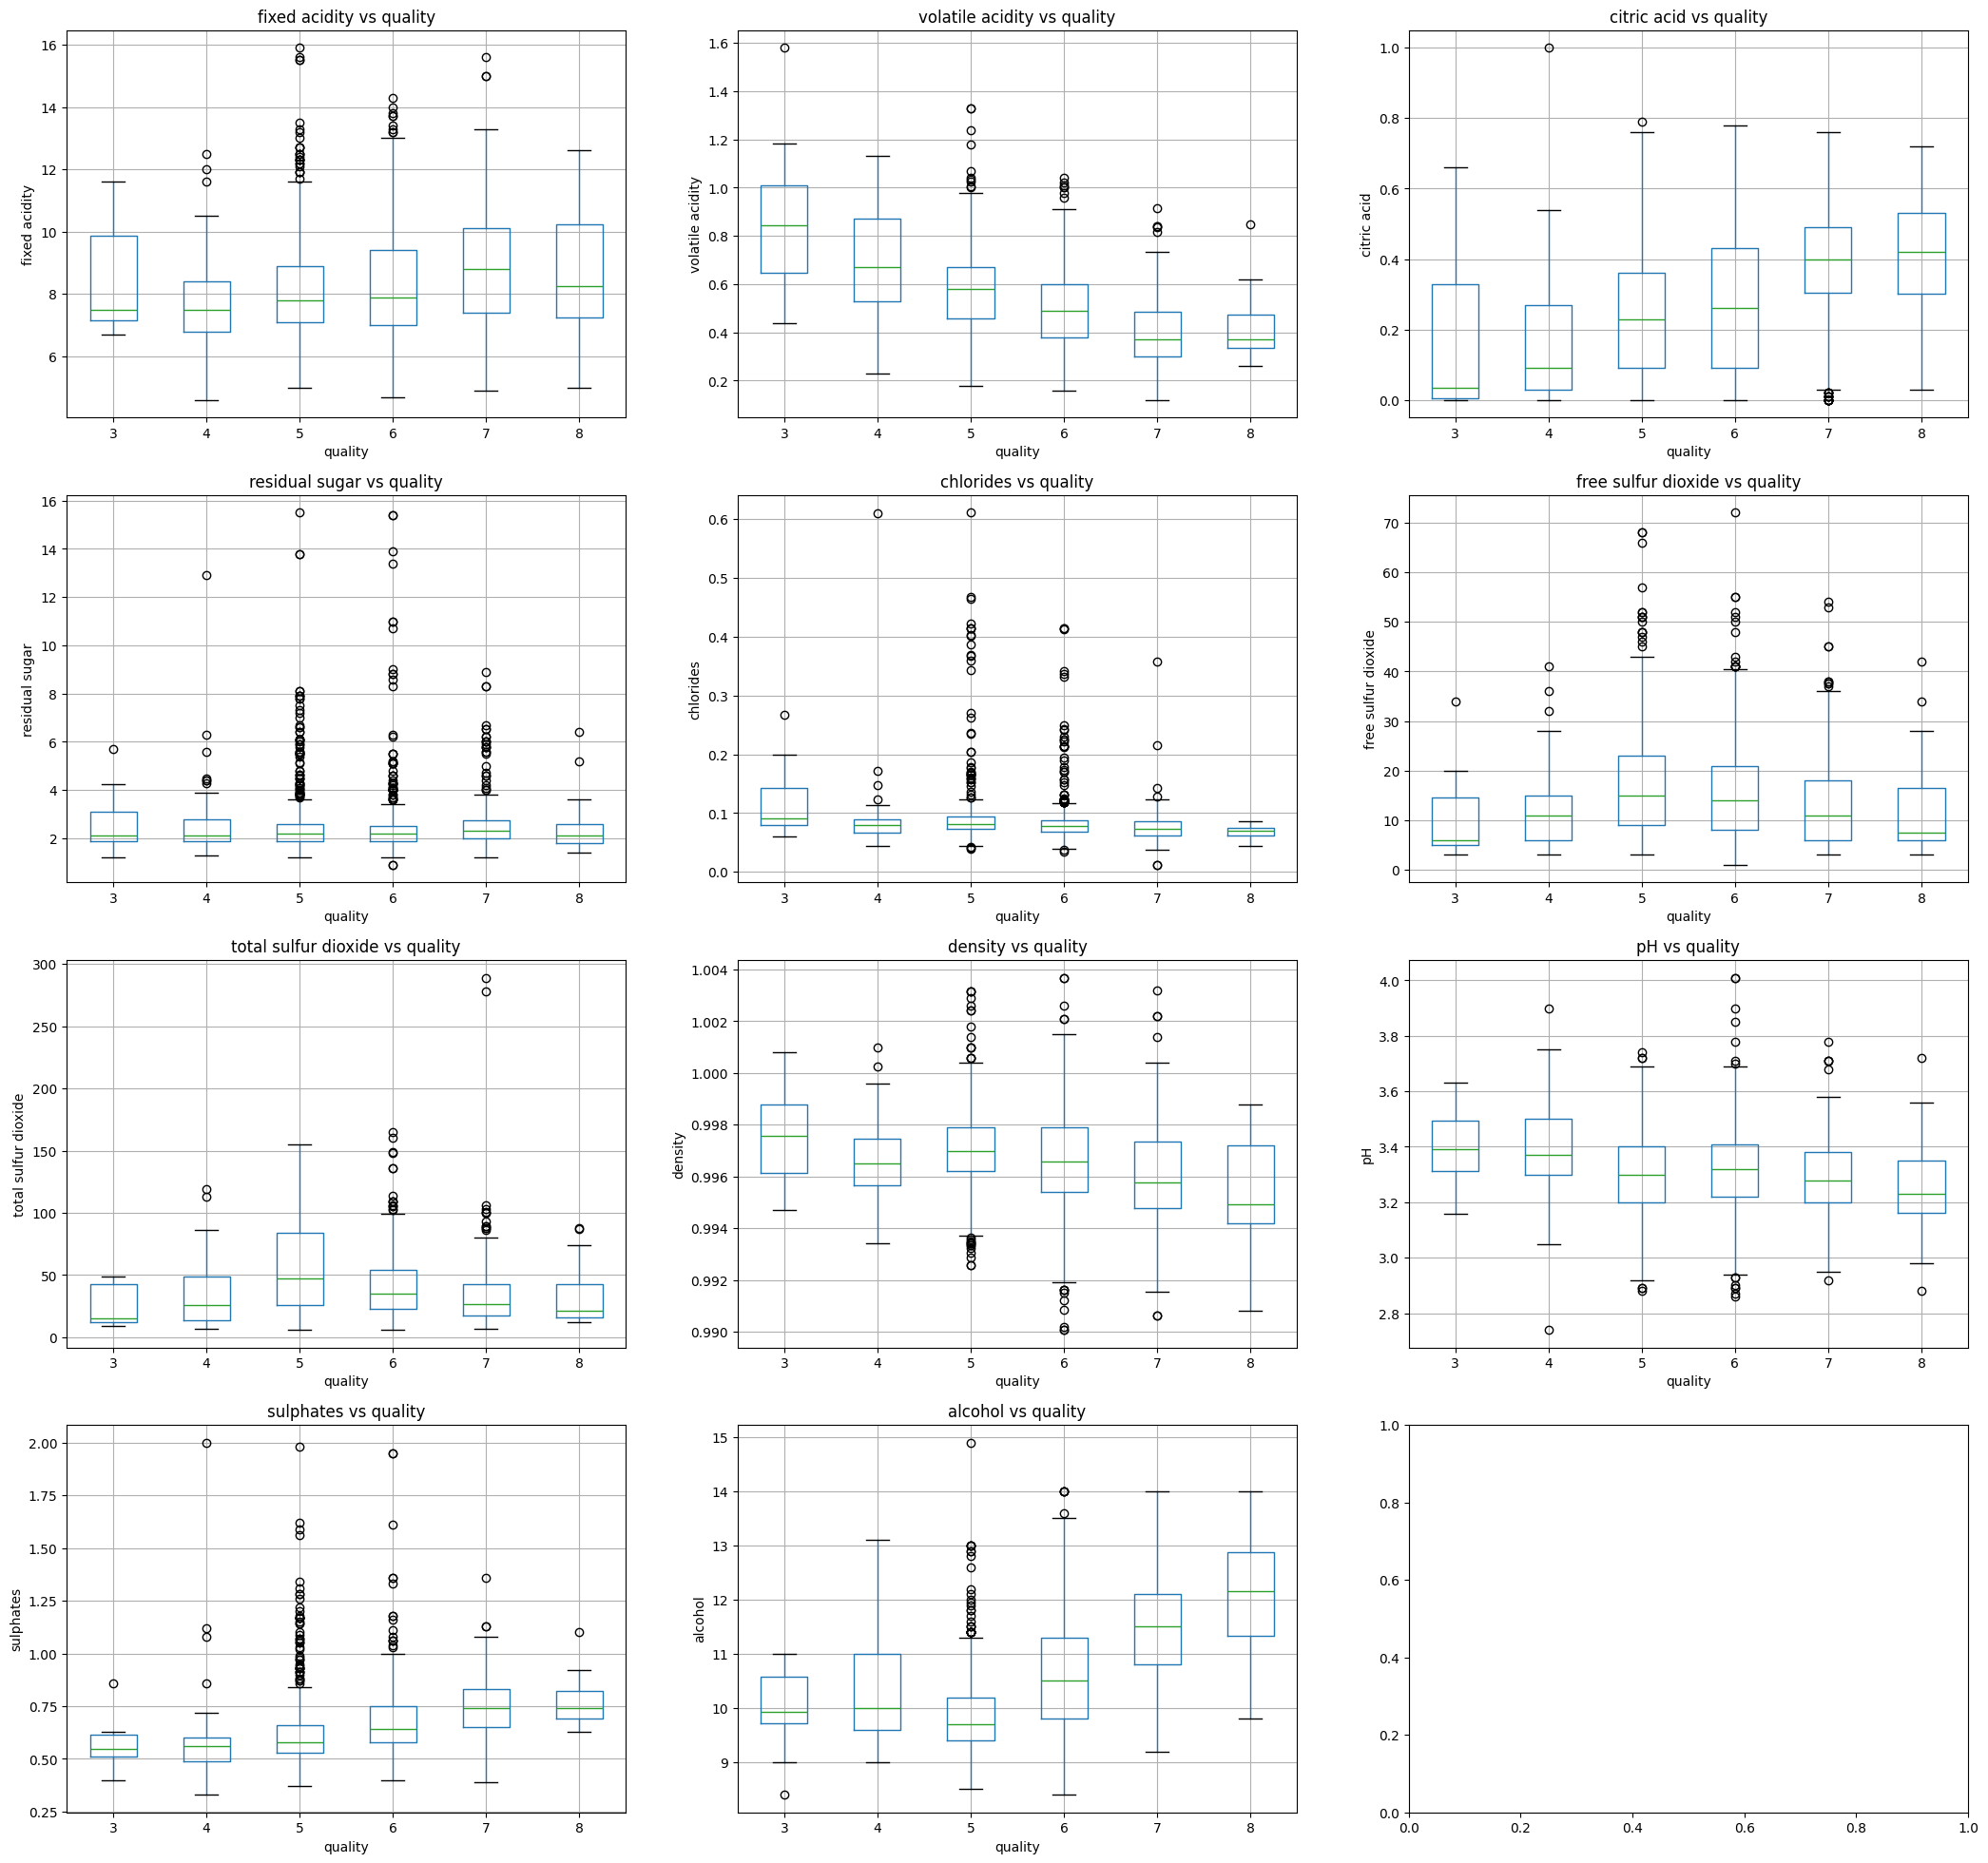

In [9]:
# plotting box plots for each feature vs the target (quality) to check for dependence and independence as well as outliers

# grabbing quality wine series and storing it in the value X_box
X_box = df["quality"]

# function used to plot the box plots
def box_plot(ax, x, y, *, title=None, ylabel=None, ylim=None):
    df = pd.DataFrame({"x": x, "y": y})
    df.boxplot(column='y', by='x', ax=ax)
    ax.set_xlabel("quality")
    if title is not None:
        ax.set_title(title)
    if ylabel is not None:
        ax.set_ylabel(ylabel)
    if ylim is not None:
        ax.set_ylim(ylim)
    ax.figure.suptitle("")

# creating a figure and subplots for all cols and mapping them to their respective axes
fig_box, axes_box = plt.subplots(4,3, figsize=(25,25))
axes_flat = axes_box.flatten()
map_to_axes_box = {col: ax for col, ax in zip(df.drop(columns=["quality"], axis=1).columns, axes_flat)}

# actually plotting graphs
for col in df.drop(columns=["quality"]).columns:
    box_plot(map_to_axes_box[col], X_box, df[col], title= f"{col} vs quality", ylabel=col)

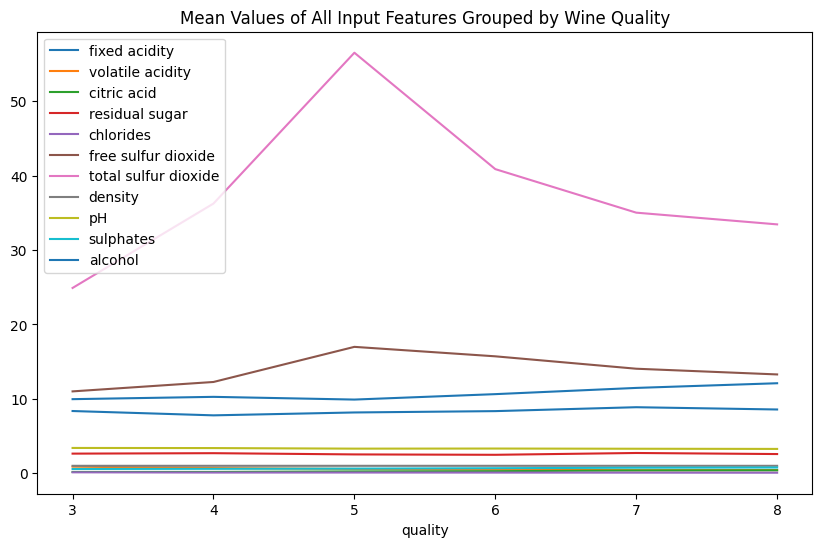

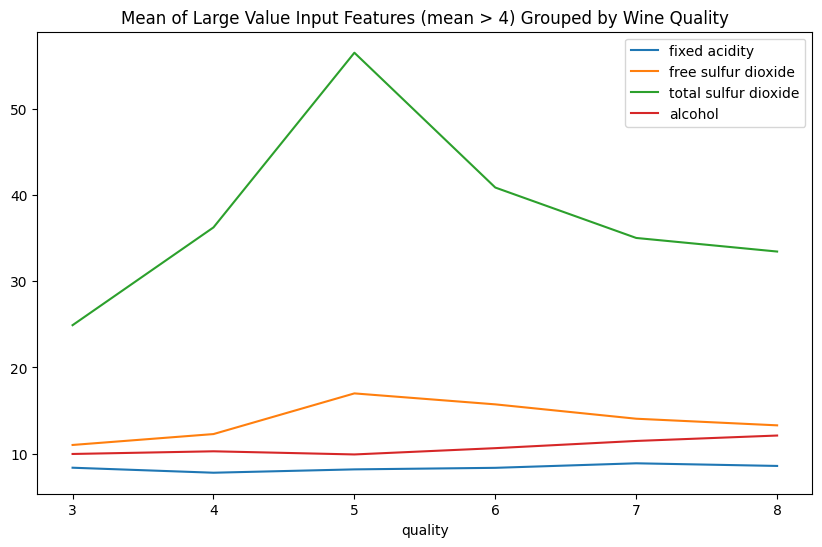

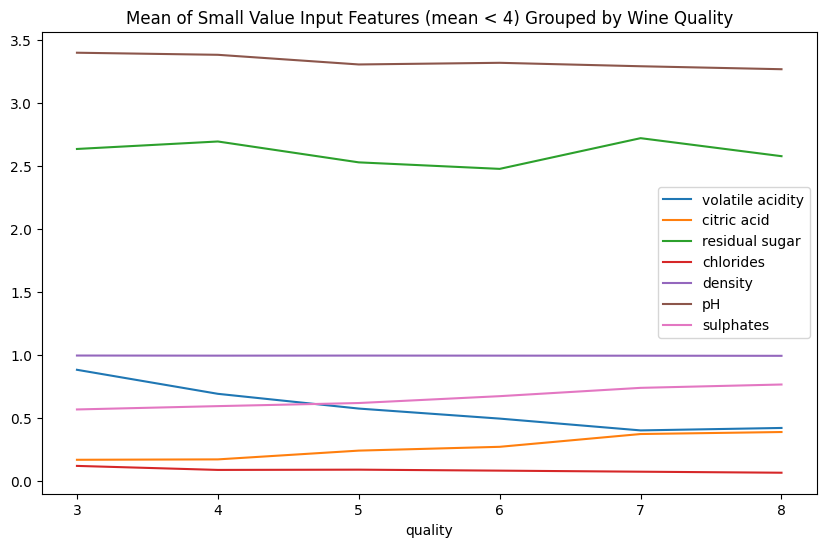

In [ ]:
# Group features by wine quality and plot the mean feature values for each quality level
df.groupby("quality").mean().plot(figsize=(10,6))
plt.title("Mean Values of All Input Features Grouped by Wine Quality")
plt.show()

# Split features into two groups based on their overall mean magnitude
# (helps visualization since some features are on much larger scales)
small_value_mean = [col for col in df.columns.drop("quality") if df[col].mean() < 4]
large_value_mean = [col for col in df.columns.drop("quality") if df[col].mean() > 4]

# Plot only the larger magnitude features (overall mean > 4)
df.groupby("quality").mean().drop(columns=small_value_mean).plot(figsize=(10,6))
plt.title("Mean of Large Value Input Features (mean > 4) Grouped by Wine Quality")
plt.show()

# Plot only the smaller magnitude features (overall mean < 4)
df.groupby("quality").mean().drop(columns=large_value_mean).plot(figsize=(10,6))
plt.title("Mean of Small Value Input Features (mean < 4) Grouped by Wine Quality")
plt.show()

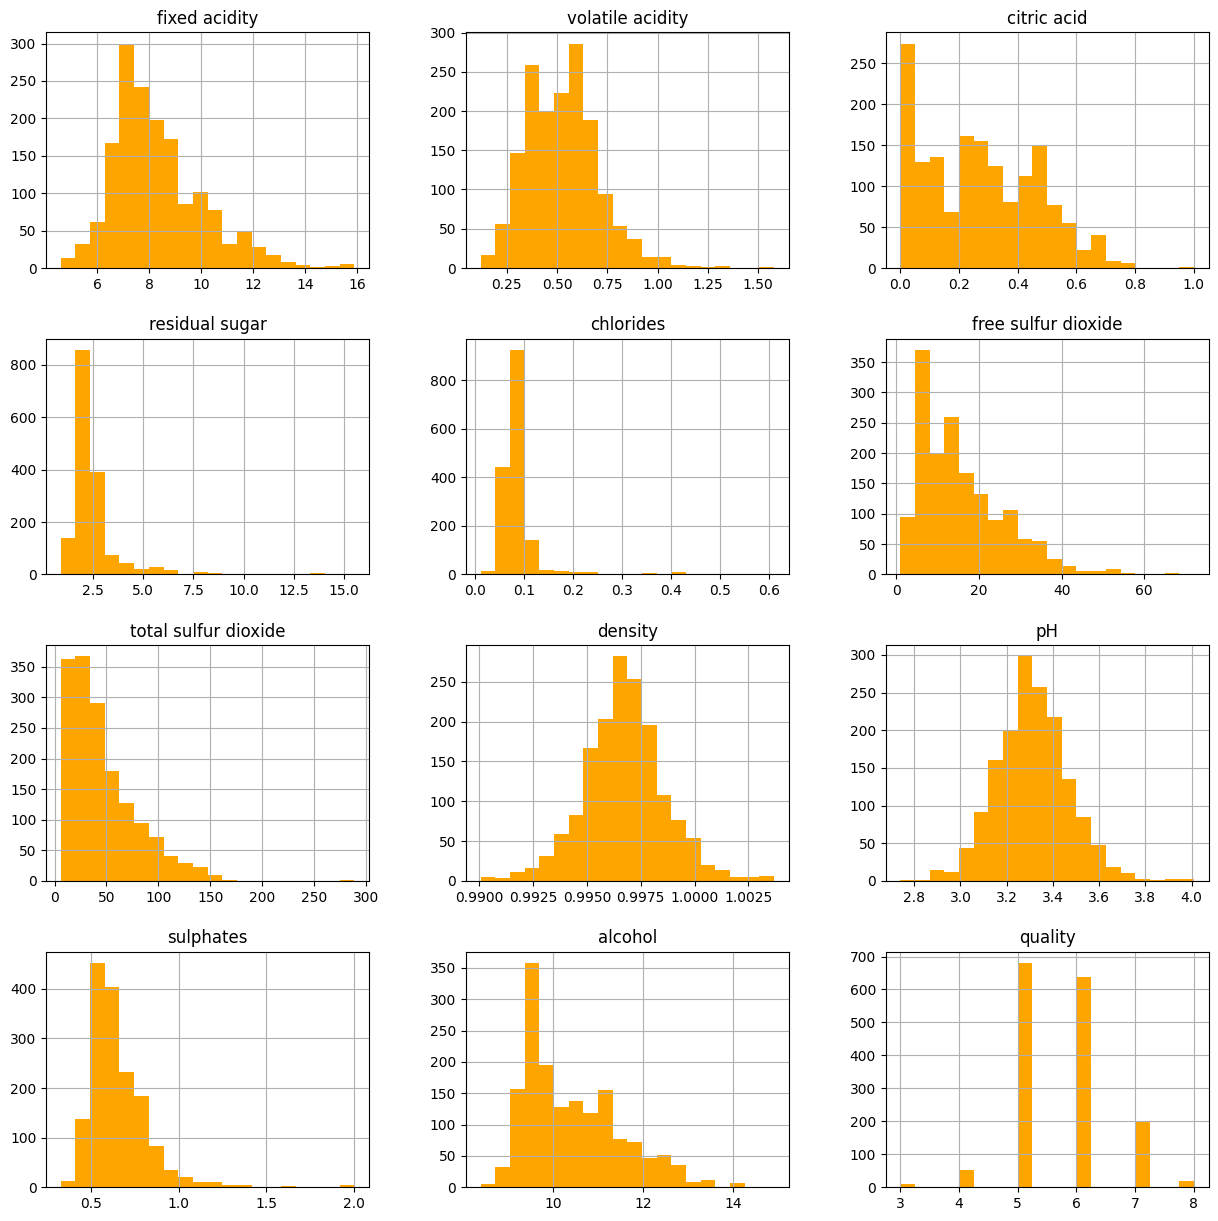

In [10]:
# plotting histograms for every column
axes_hist = df.hist(figsize=(15,15), bins=20, color="orange")
plt.show()

## Replotting Interesting Graphs

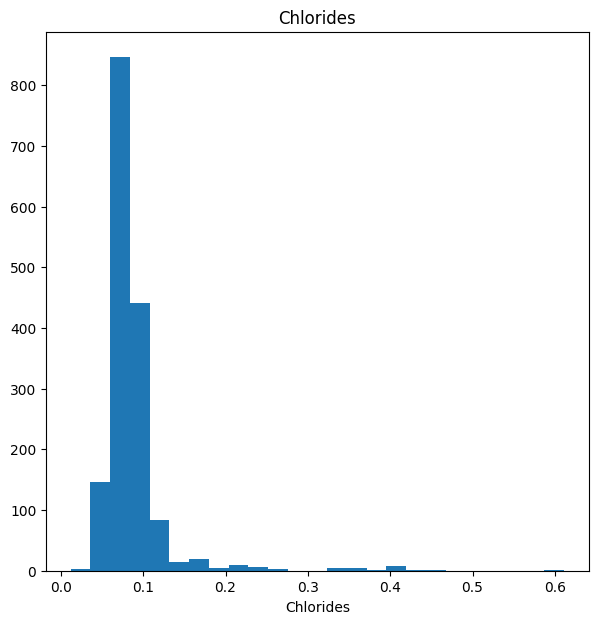

In [11]:
# replotting chlorides histogram to show possible outlier
plt.figure(figsize=(7,7))
plt.hist(df["chlorides"], bins=25)
plt.title("Chlorides")
plt.xlabel("Chlorides")
plt.show()

In [12]:
# performing a query to find outliers in dataset
df.query("chlorides > 0.5")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
151,9.2,0.52,1.00,3.4,0.610,32.0,69.0,0.9996,2.74,2.00,9.4,4
258,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5


### Chlorides Histogram Explanation

The histogram of the chlorides column shows a right-skewed distribution with two extreme outliers around 0.6 g/L. Most observations are concentrated around 0.1 g/L with a long tail that extends towards the higher values. This graph was chosen as a visual representation of how outliers can affect the scale/interpretability of the graph. Outlier detection is also a crucial part of exploratory data analysis because outliers can disproportionately affect model evaluation, especially for models that use mean squared error, where large numbers receive a much higher weight. 

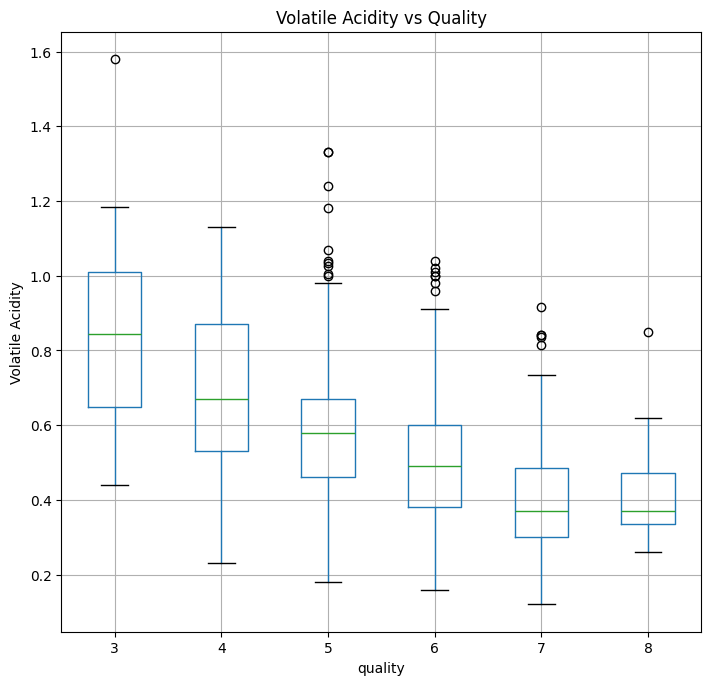

In [13]:
# replotting volatile acidity and quality boxplot to show dependency
df.boxplot(column="volatile acidity", by="quality", figsize=(8,8))
plt.suptitle("")
plt.title("Volatile Acidity vs Quality")
plt.ylabel("Volatile Acidity")
plt.show()

### Volatile Acidity vs Quality Explanation

The above boxplot of volatile acidity versus quality highlights an important relationship between the two variables. As wine quality increases, the median volatile acidity decreases, indicating a negative association between volatile acidity and red wine quality. Understanding relationships between an input features and the target variable are important because features that exhibit strong associations with the target are often valuable candidates for feature selection. This graph also highlights outliers as seen by the datapoint with a volatile acidity of about 1.6 g/L. 

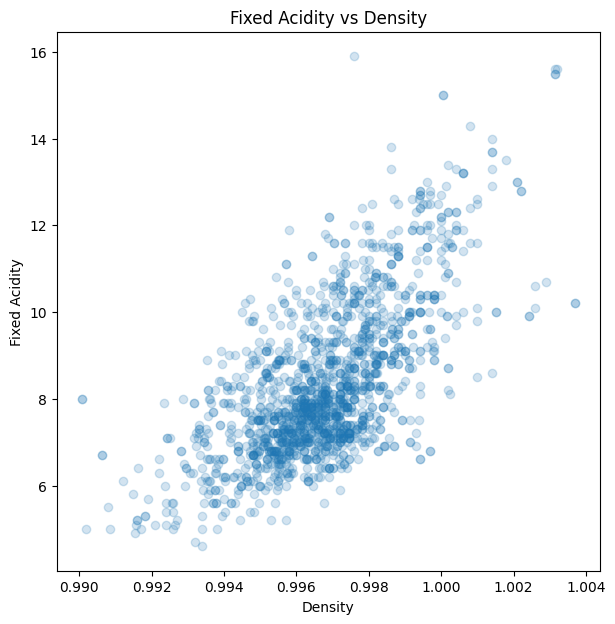

In [14]:
# creating a scatter plot for density and fixed acidity
plt.figure(figsize=(7,7))
plt.scatter(df["density"], df["fixed acidity"], alpha=0.2)
plt.title("Fixed Acidity vs Density")
plt.xlabel("Density")
plt.ylabel("Fixed Acidity")
plt.show()

### Fixed Acidity vs Density Explanation

The above scatter plot of fixed acidity versus density shows a positive association between the two input features. As fixed acidity increases so does the density of the wine. Examining relationships between input features is important because strong associations may indicate redundant information being provided to a model. In dimensionality reduction techniques such as Principal Component Analysis (PCA), highly correlated features are often compressed into the same principal component, suggesting that these two variables may contribute similarly to the overall variance in the dataset. 

YOUR ANSWERS HERE

### Problem 4 (5 points)

Plot the correlation matrix of the numeric columns in the data set.
Which pair of different columns were highlighted as the most correlated?

In [15]:
# YOUR CODE HERE
# create a correlation matrix
corr_matrix = df.corr(numeric_only=True)

# remove correlation between a column and itself
np.fill_diagonal(corr_matrix.values, np.nan)

corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,NaN,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,NaN,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,NaN,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,NaN,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,NaN,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,NaN,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,NaN,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,NaN,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,NaN,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,NaN,0.093595,0.251397


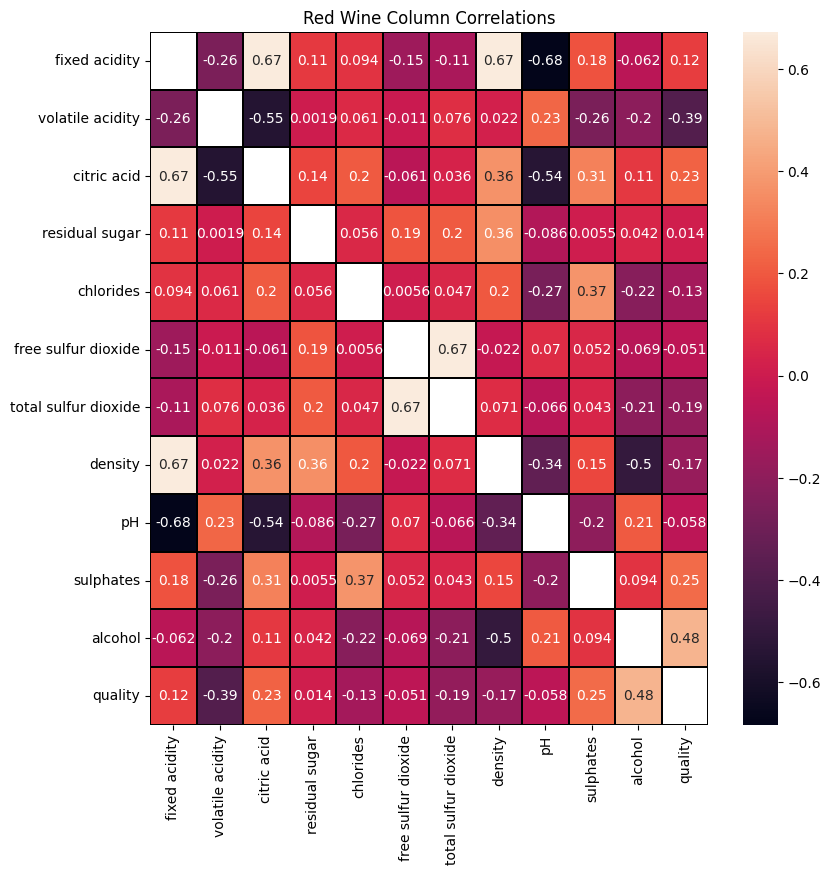

In [46]:
import seaborn as sns

plt.figure(figsize=(9,9))
sns.heatmap(corr_matrix, linecolor="black", linewidths=0.3, annot=True)
plt.title("Red Wine Column Correlations")
plt.show()

In [16]:
# create a dataframe with the max correlation for each column
max_corr_df = pd.DataFrame(corr_matrix.max()).reset_index().rename(columns={"index": "features", 0: "correlation"})

#find the max correlation value
max_corr_num = corr_matrix.max().max()
print(f"The value of the most correlated features is: {max_corr_num:.3f}")


The value of the most correlated features is: 0.672


In [45]:
# create a dictionary from max_corr_df mapping each feature to its max correlation value
dict_corr = {features: correlation for features, correlation in zip(max_corr_df["features"], max_corr_df["correlation"])}

# finding and printing the most correlated features
for key, value in dict_corr.items():
    if value == max_corr_num:
        print(key, f"{value:.3f}")

fixed acidity 0.672
citric acid 0.672


## Most Correlated Columns

Citric Acid and Fixed Acidity with a correlation of 0.672. 

### Problem 5 (10 points)

Pick three different regression model classes to try in problem 6 from the scikit-learn documentation.
For each class, provide a link to the scikit-learn documentation, and a link to another web page describing how that kind of model works.
The second link should not be from scikit-learn, but Wikipedia is acceptable.
You do not need to understand the methods at this time, but it is good to be comfortable researching them.

#### Ordinary Least Squares Regression:

1. https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares</br>
2. https://www.datacamp.com/tutorial/ols-regression

#### Support Vector Regression:

1. https://scikit-learn.org/stable/modules/svm.html#regression</br>
2. https://www.mathworks.com/help/stats/understanding-support-vector-machine-regression.html

#### Decision Tree Regressor:

1. https://scikit-learn.org/stable/modules/tree.html#regression</br>
2. https://towardsdatascience.com/decision-tree-regressor-explained-a-visual-guide-with-code-examples-fbd2836c3bef/


YOUR ANSWERS HERE

### Problem 6 (50 points)

Build three different regression models using the entire data set.
Plot the actual target vs the predicted values for each in one chart.
Compute the L2 and L1 losses for each of them.
You may use any regression class provided provided by scikit-learn, and you may reuse one class as long as you change its parameters enough to see different results.

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# splitting data into X (input cols) and y (target values)
X = df.drop(columns=["quality"])
y = df["quality"]

# splitting the data further into training and testing portions (test size 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

### Linear Regression

In [19]:
# building the linear regression model, fitting it to the training data, and making predictions based on testing data
ln_reg_model = LinearRegression()
ln_reg_model.fit(X_train, y_train)
ln_reg_predictions = ln_reg_model.predict(X_test)

In [20]:
# computing the L2 loss of the model
ln_reg_L2 = np.mean((y_test - ln_reg_predictions)**2)
print(f"The L2 loss of the linear regression model is: {ln_reg_L2:.3f}")

The L2 loss of the linear regression model is: 0.452


In [21]:
# computing the L1 loss of the model
ln_reg_L1 = np.mean(np.abs(y_test - ln_reg_predictions))
print(f"The L1 loss of the linear regression model is: {ln_reg_L1:.3f}")

The L1 loss of the linear regression model is: 0.530


### Support Vector Regression

In [22]:
# building support vector regression model, fitting the training data to it, and making predictions based on testing data
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_predictions = svr_model.predict(X_test)

In [23]:
# computing the L2 loss of the model 
svr_L2 = np.mean((y_test - svr_predictions)**2)
print(f"The L2 loss of the support vector regression model is: {svr_L2:.3f}")

The L2 loss of the support vector regression model is: 0.617


In [24]:
# computing the L1 loss of the model
svr_L1 = np.mean(np.abs(y_test - svr_predictions))
print(f"The L1 loss of the support vector regression model is: {svr_L1:.3f}")

The L1 loss of the support vector regression model is: 0.595


### Decision Tree Regression

In [25]:
# building decision tree regression model, fitting the training data to it, and making predictions based on testing data
tree_reg_model = DecisionTreeRegressor(max_depth=5) 
tree_reg_model.fit(X_train, y_train)
tree_reg_predictions = tree_reg_model.predict(X_test)

In [26]:
# computing the L2 loss of the model 
tree_reg_L2 = np.mean((y_test - tree_reg_predictions)**2)
print(f"The L2 loss of the decision tree regression model is: {tree_reg_L2:.3f}")

The L2 loss of the decision tree regression model is: 0.479


In [27]:
# computing the L1 loss of the model
tree_reg_L1 = np.mean(np.abs(y_test - tree_reg_predictions))
print(f"The L1 loss of the decision tree regression model is: {tree_reg_L1:.3f}")

The L1 loss of the decision tree regression model is: 0.526


### Plotting Model Graphs

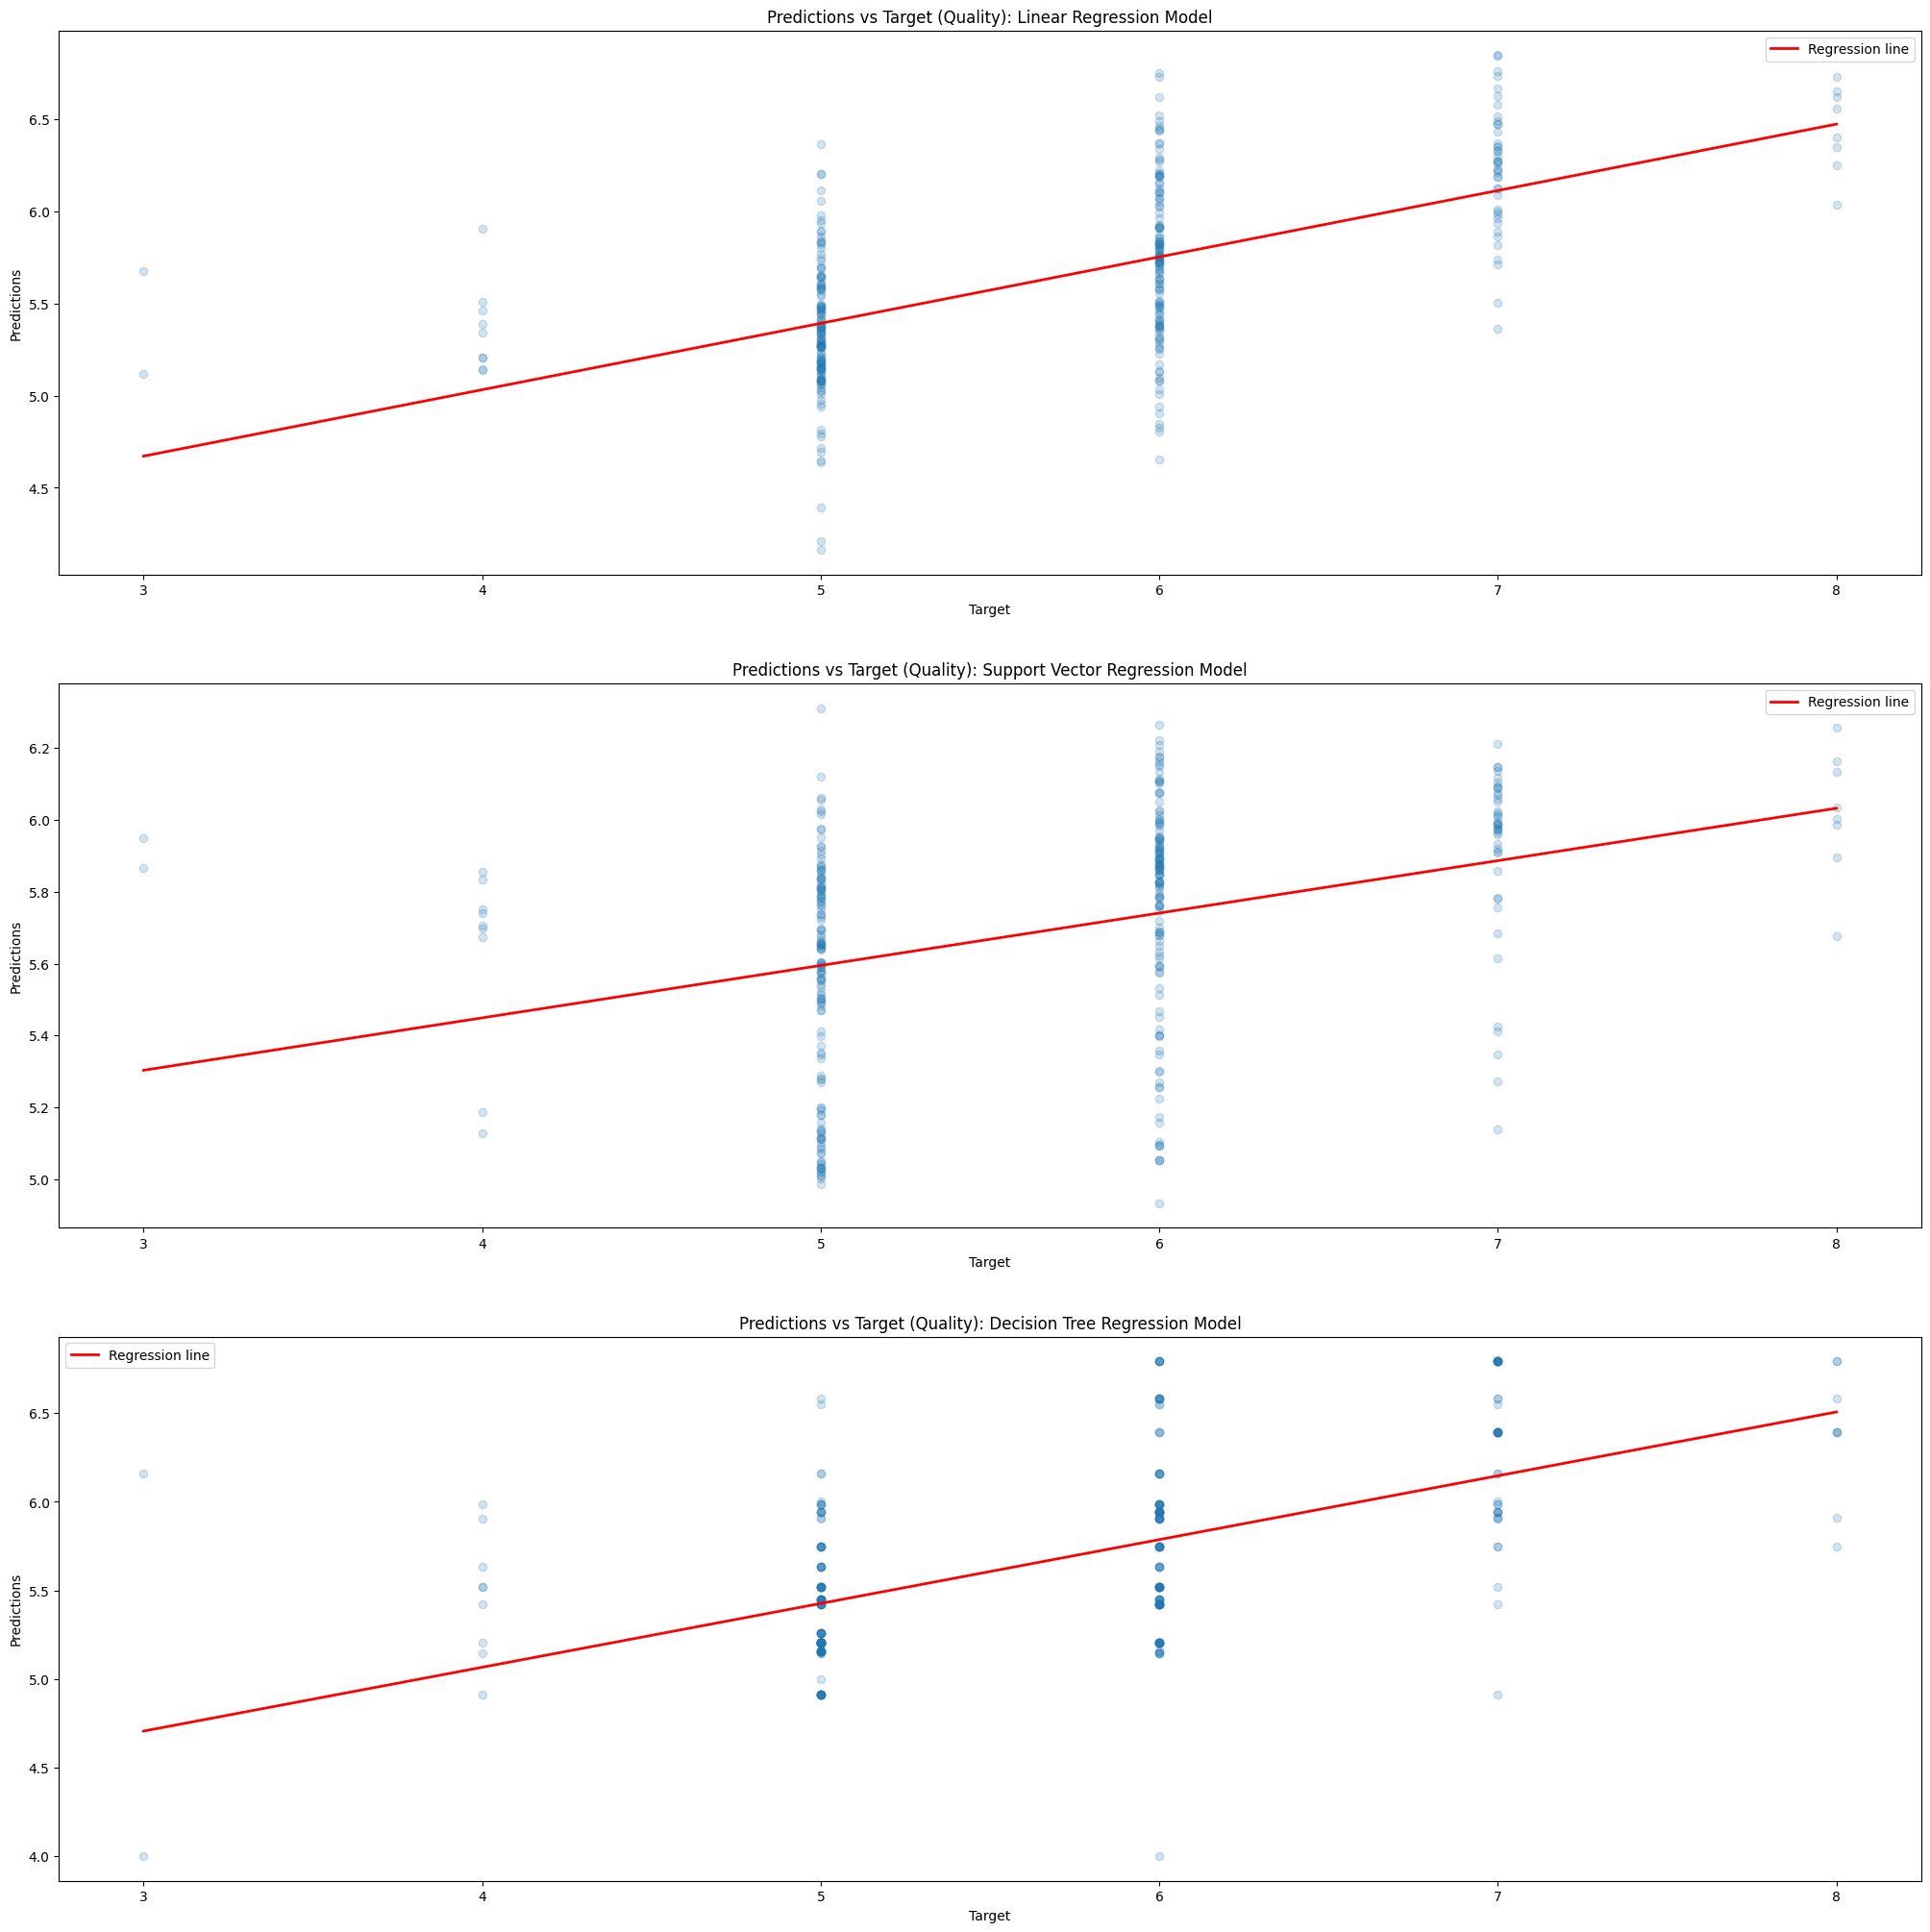

In [47]:
# function that plots actual vs predicted values in one big graph with subplots
def target_vs_predicted_plot(ax, predictions, *, title=None):
    ax.scatter(y_test, predictions, alpha=0.2)
    ax.set_xlabel("Target")
    ax.set_ylabel("Predictions")

    if title is not None:
        ax.set_title(title)

    m, b = np.polyfit(y_test, predictions, deg=1)
    x_line = np.linspace(min(y_test), max(y_test), 200)
    y_line = m * x_line + b
    ax.plot(x_line, y_line, color="red", linewidth=2, label="Regression line") 
    ax.legend()

model_list = [ln_reg_model, svr_model, tree_reg_model]

fig, axes = plt.subplots(3, 1, figsize=(25,25))
in_out_axes = axes.flatten()
map_to_axes = {model: ax for model, ax in zip(model_list, in_out_axes)}

#plotting linear regression results
target_vs_predicted_plot(map_to_axes[ln_reg_model], ln_reg_predictions, title="Predictions vs Target (Quality): Linear Regression Model")

# plotting support vector regression results
target_vs_predicted_plot(map_to_axes[svr_model], svr_predictions, title="Predictions vs Target (Quality): Support Vector Regression Model")

# plotting decision tree regression results
target_vs_predicted_plot(map_to_axes[tree_reg_model], tree_reg_predictions, title="Predictions vs Target (Quality): Decision Tree Regression Model")

### Problem 7 (30 points)

Use 5-fold cross-validation to repeat building the same three kinds of regression models. Compare the L2 losses predicted by cross-validation against the L2 losses training against the whole data set. (The difference is likely from overfitting in the latter.)

In [29]:
# YOUR CODE HERE
from sklearn.model_selection import cross_validate

def five_fold_cross_validate(model_type):
    cross_validate_model = cross_validate(model_type, X_train, y_train, cv=5, scoring="neg_mean_squared_error")
    L2_score = -cross_validate_model["test_score"].mean()
    print(f"The cross validated L2 loss for {model_type} is: {L2_score:.3f}")

five_fold_cross_validate(LinearRegression()) 

five_fold_cross_validate(SVR())

five_fold_cross_validate(DecisionTreeRegressor(max_depth=5))

The cross validated L2 loss for LinearRegression() is: 0.424
The cross validated L2 loss for SVR() is: 0.545
The cross validated L2 loss for DecisionTreeRegressor(max_depth=5) is: 0.455


### Model Comparison through L2 

The cross-validation (CV) L2 scores for linear regression and decision tree regression performed about the same as the models built against the whole data set, with the whole dataset models performing slightly worse. The scores for linear regression were CV L2=0.424 and whole dataset L2=0.452. The scores for decision tree regression were CV L2=0.465 and whole dataset L2=0.479. Both of these models do not overfit, and generalize well. The Support Vector Regression (SVR) model L2 values were, CV L2=0.545 and the whole dataset L2=0.617. There is a moderate difference in the L2 results for the SVR model and it is due to the non-scaled values of the input columns. The model is geometrically distorted when the input-columns values are not scaled properly. This causes the model to not generalize and become unstable. A proper SVR model for this dataset would scale the input values (mean=0, standard deviation=1).


YOUR ANSWERS HERE

### Problem 8 (25 points)

Build three different regression models as in problem 6, but preprocess the data so that each column has mean zero and standard deviation one first.
For full credit, use a scikit-learn pipeline for each model.
For each model, compare the L2 losses -- which of them performed differently from your results in problem 6?

(This process will be covered in week 13.)

In [30]:
# YOUR CODE HERE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# function scales data and evaluates a given models performance by computing L2
def standard_scaler_models(model_type): 
    pipe = make_pipeline(StandardScaler(), model_type)
    pipe.fit(X_train, y_train)
    pipe_predictions = pipe.predict(X_test)
    pipe_L2 = np.mean((y_test - pipe_predictions)**2)
    print(f"The {model_type} L2 after preprocessing the data with Standard Scaler is: {pipe_L2:.3f}")
    return pipe_predictions 


standard_scaler_models(LinearRegression())

standard_scaler_models(DecisionTreeRegressor(max_depth=5))

svr_predictions_scaled = standard_scaler_models(SVR())

The LinearRegression() L2 after preprocessing the data with Standard Scaler is: 0.452
The DecisionTreeRegressor(max_depth=5) L2 after preprocessing the data with Standard Scaler is: 0.479
The SVR() L2 after preprocessing the data with Standard Scaler is: 0.409


### Model Comparison

The model that performed best when scaling the data (mean=0, standard deviation=1) was the Support Vector Regression (SVR) model. The other models (linear regression and decision tree regression) performed the exact same as the models created in problem 6. These results show that linear regression and decision tree regression models are not hindered by a large variance in numeric feature values. However, for SVR models, variance between numeric feature values is very important. The SVR model initially performed the worst in problem 6 with L2=0.617. After the input columns were properly scaled the model had an L2=0.409, outperforming every other model so far. 

YOUR ANSWERS HERE

### Problem 9 (5 points)

A colleague suggests that you find better models by repeatedly building decision trees with random depth limits.
They say that trying 1000 such models will likely find an improvement as long as you use cross validation.
Give a one sentence response to this suggestion. 

YOUR ANSWERS HERE

While in theory this method could work, it would be computationally expensive and inefficient compared to tuning the parameters of existing models and cross-validating the results. 

### Problem 10 (10 points)

Pick a best model from all the models that you built and otherwise described in this project.
Explain how you picked it, including what criteria you chose, and how the other models compared by that criteria.
As much as possible, justify that problem in the context of the original data set. 

YOUR ANSWERS HERE

### Best Model from Project

The best model from this project, when comparing L2 values, is the Support Vector Regression (SVR) Model that used scaled values (mean=0, standard deviation=1). The model had an L2=0.409, which is 5-fold-cross-validated below and was found to have an L2=0.397 on the training set. Compared to the other models made and tested in this project, the SVR model using scaled values performed best by a moderate margin. The linear regression model had a L2=0.452 for both the scaled and unscaled versions of the model, and decision tree regression model had an L2=0.479 for both the scaled and unscaled versions of the model. The SVR model initially performed the worst. In problem 6 the SVR model had an L2=0.617 which was a very significant result for one particular reason. To perform well, SVR models need scaled values, or the dataset needs to not have a large variance between numeric feature values. For this specific dataset, features such as Total Sulfur Dioxide and Free Sulfur Dioxide have extremely large numerical values such as 289 and 72, while the chlorides column has a max value of 0.61. This greatly interferes with the SVR models ability to predict values accurately, which is why a shift in L2 of 0.208 is seen between the SVR model with scaled values versus the SVR model without scaled values. 

In [31]:
# repeating the SVR cross validation with properly scaled numbers to see if the model is still as good or similar to the results above.

svr_pipe = make_pipeline(StandardScaler(), SVR())
five_fold_cross_validate(svr_pipe)

The cross validated L2 loss for Pipeline(steps=[('standardscaler', StandardScaler()), ('svr', SVR())]) is: 0.397


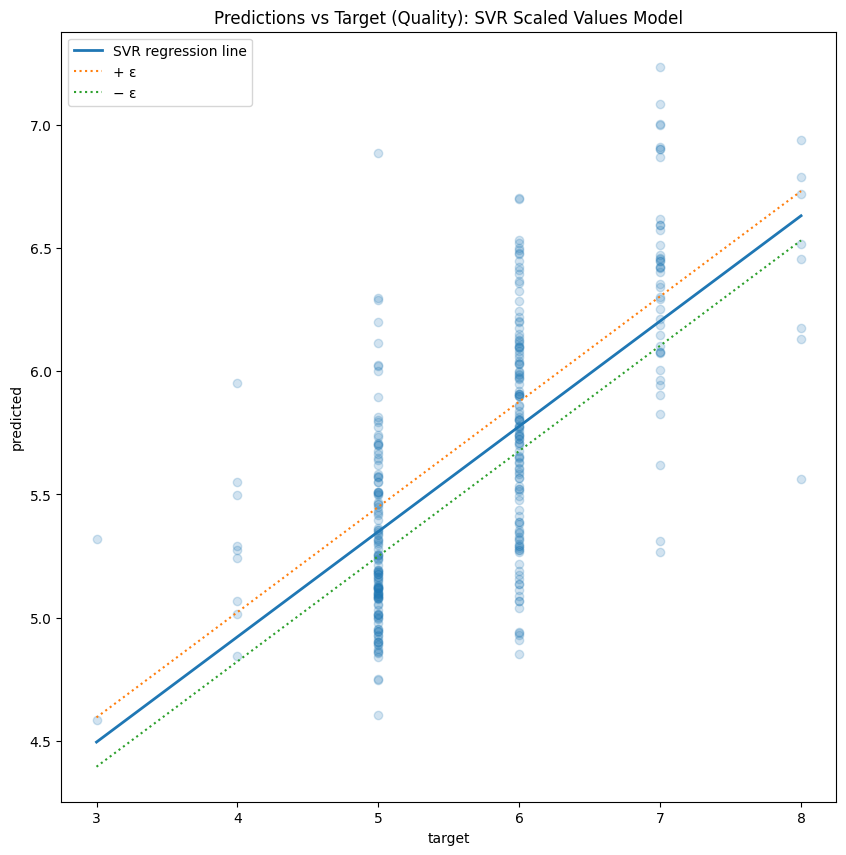

In [48]:
# creating SVR graph for visualization (just for curiosity purposes)
plt.figure(figsize=(10,10))
plt.scatter(y_test, svr_predictions_scaled, alpha=0.2)
plt.xlabel("target")
plt.ylabel("predicted")
plt.title("Predictions vs Target (Quality): SVR Scaled Values Model")

# plotting regression line
m_svr, b_svr = np.polyfit(y_test, svr_predictions_scaled, deg=1)
x_line_svr = np.linspace(min(y_test), max(y_test), 200)
y_line_svr = m_svr * x_line_svr + b_svr
plt.plot(x_line_svr, y_line_svr, linewidth=2, label="SVR regression line")

# plotting epsilon values
epsilon = svr_pipe.named_steps["svr"].epsilon
plt.plot(x_line_svr, y_line_svr + epsilon, linestyle=":", label="+ ε")
plt.plot(x_line_svr, y_line_svr - epsilon, linestyle=":", label="− ε")

plt.legend()
plt.show()